# Predicting success for start-ups

## Haomin Wang

## Abstract

There are thousands of companies coming out worldwide each year. Over the past decades, there has been a rapid
growth in the formation of new companies both in the US and China. Thus, it is an important and challenging task
to understand what makes companies successful and to predict the success of a company. In this project, we used
Crunchbase data to build a predictive model through supervised learning to classify which start-ups are successful
and which aren’t. We explored K-Nearest Neighbours (KNN) model, Logistic Regression (LR), Random Forests (RF), Decision Tree and Support Vector Machine(SVM) model. We used F1 score as the metric and found that
Random Forest model has a better performance on this task, which achieves 0.803974 of F1 score and 0.955354 of accuracy.

## Introduction

Thousands of companies are emerging around the world each year. Among them, some are merged and acquired (M&A), or go to
public (IPO), while others may vanish and disappear. What makes this difference and leads to the different endings for each company?
How to predict the success of companies? If the investors can know how likely the company will achieve success given their current
information, they can make a better decision on the investments. Therefore, in this project, given some key features of a company, we
want to predict the probability of its success. More specifically, the input features are of two types: text features (such as industry
category list and location) and numerical features (such as the amount of money a company already raised). We then use Logistic
Regression, Random Forests, and K-Nearest Neighbours to output a predicted probability of success. Here we define the company
success as the event that gives a large sum of money to the company’s founders, investors and early employees, specifically through a
process of M&A (Merger and Acquisition) or an IPO (Initial Public Offering). Finally, we use F1 score as the metric to compare
the performance of these five models.


## Dataset and features

The dataset we used was extracted from Crunchbase Data Export containing 60K+ companies’ information updated to December 2015. There were four data files, named “company”, “investments”, “rounds” and “acquisition”. The “company” file contains most comprehensive information of the companies, while other files contains more detailed information regarding the investment operations. Thus, we chose the file “company” as the base and extracted meaningful features from other files to add into it.


## Dataset Overview

The "company" dataset consists the following columns:

• Name: company’s name

• Homepage_url: the website of the company

• Category_list: the industry category the company belongs to, including up to four subcategory divisions

• Funding_total_usd: the total amount of funding in all rounds of investments

• Status: the operation status of the company (0 = closed or operating, 1 = ipo or acquired)

• Country_code: the country of company’s headquarter

• State_code: the state of company’s headquarter

• Region: the region of company’s headquarter

• City: the city of company’s headquarter

• Funding_rounds: total number of funding rounds

• Founded_at: the date company founded (in string format ‘2007-01-01’)

• First_funding_at: the first time the company raised money (in string format ‘2008-03-19’)

• Last_funding_at: the last time the company raised money (in string format ‘2008-03-19’)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC,LinearSVC,NuSVC
from sklearn.neural_network import MLPClassifier
import pydot
import pydotplus
from sklearn import tree
import xgboost as xgb

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [2]:
comp = pd.read_csv("companies.csv")

In [3]:
pd.value_counts(comp.state_code).head(20).reset_index()

index  state_code
0     CA       12900
1     NY        3952
2     MA        2542
3     TX        1995
4     H9        1911
5      7        1414
6     FL        1295
7     WA        1261
8      2        1160
9     IL        1082
10    PA        1001
11    CO         955
12    ON         916
13     5         789
14    A8         745
15    16         738
16    VA         734
17    NJ         714
18    GA         706
19    OH         664

## pick company after 1990-01-01

We noticed some skewness regarding the distribution of date of funding events in this dataset. To reduce the bias
in the old invest events, we filtered data before 1990.

In [4]:
df = comp[comp['first_funding_at']>='1990-01-01']

In [5]:
df.head(20)

permalink                         name  \
0                        /organization/-fame                        #fame   
1                     /organization/-qounter                     :Qounter   
2        /organization/-the-one-of-them-inc-       (THE) ONE of THEM,Inc.   
3                      /organization/0-6-com                      0-6.com   
4             /organization/004-technologies             004 Technologies   
5           /organization/01games-technology           01Games Technology   
6        /organization/0ndine-biomedical-inc       Ondine Biomedical Inc.   
7                       /organization/0xdata                       H2O.ai   
8                            /organization/1                     One Inc.   
9                  /organization/1-2-3-listo                  1,2,3 Listo   
10                     /organization/1-4-all                      1-4 All   
11            /organization/1-618-technology             1.618 Technology   
12               /organization/1-800-dentist                1-800-DENTIST   
13               /organization/1-800-doctors                1-800-DOCTORS   
14  /organization/1-800-publicrelations-inc-  1-800-PublicRelations, Inc.   
15                /organization/1-mainstream                 1 Mainstream   
16                     /organization/1-of-99                      1 of 99   
17                 /organization/10-20-media                  10-20 Media   
18             /organization/10-minutes-with              10 Minutes With   
19                  /organization/1000-corks                   1000 Corks   

                          homepage_url  \
0                   http://livfame.com   
1               http://www.qounter.com   
2                  http://oneofthem.jp   
3                   http://www.0-6.com   
4    http://004gmbh.de/en/004-interact   
5               http://www.01games.hk/   
6                 http://ondinebio.com   
7                       http://h2o.ai/   
8                   http://whatis1.com   
9              http://www.123listo.com   
10                                 NaN   
11  http://www.Homeandcondogallery.com   
12          http://www.1800dentist.com   
13              http://1800doctors.com   
14  http://www.1800publicrelations.com   
15          http://www.1mainstream.com   
16                                 NaN   
17           http://www.10-20media.com   
18            http://10minuteswith.com   
19                http://1000corks.com   

                                        category_list funding_total_usd  \
0                                               Media          10000000   
1   Application Platforms|Real Time|Social Network...            700000   
2                                   Apps|Games|Mobile           3406878   
3                                         Curated Web           2000000   
4                                            Software                 -   
5                                               Games             41250   
6                                       Biotechnology            762851   
7                                           Analytics          33600000   
8                                              Mobile           1150050   
9                                          E-Commerce             40000   
10                       Entertainment|Games|Software                 -   
11                 Networking|Real Estate|Web Hosting                 -   
12                                Health and Wellness                 -   
13                                Health and Wellness           1750000   
14          Internet Marketing|Media|Public Relations           6000000   
15                   Apps|Cable|Distribution|Software           5000000   
16                                Entertainment|Games            100000   
17                                         E-Commerce           2050000   
18                                          Education           4400000   
19                                

## Generate Dummy variables for status( success of not), location, years of funding

We labeled the company that has M&A with 1, otherwise 0. The number of data labeled 0 to labeled 1 is over 8 to 1, which is quite imbalanced.

In [6]:
from datetime import date
from datetime import datetime

In [7]:
df['year_first_fund'] =df['first_funding_at'].apply(lambda a:2019 - datetime.strptime(a,'%Y-%m-%d').year)
df['year_last_fund'] =df['last_funding_at'].apply(lambda a:2019 - datetime.strptime(a,'%Y-%m-%d').year)
df['tag']=0
df.loc[df.status == 'acquired','tag'] = 1
df.loc[df.status == 'ipo','tag'] = 1
df['state_CA'] = 0
df.loc[df.state_code == 'CA','state_CA'] = 1
df['state_NY'] = 0
df.loc[df.state_code == 'NY','state_NY'] = 1
df['state_TX'] = 0
df.loc[df.state_code == 'TX','state_TX'] = 1
df['state_MA'] = 0
df.loc[df.state_code == 'MA','state_MA'] = 1
df['state_FL'] = 0
df.loc[df.state_code == 'FL','state_FL'] = 1

C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.

## Looking for top 5 frequencies of industries

In [8]:
industries = df.category_list.astype(str).apply(lambda x: x.replace('|', ' '))

In [9]:
from collections import Counter
Counter(industries).most_common(15)

[('Software', 3993),
 ('Biotechnology', 3614),
 ('nan', 3132),
 ('E-Commerce', 1330),
 ('Mobile', 1177),
 ('Clean Technology', 1132),
 ('Curated Web', 1050),
 ('Hardware + Software', 931),
 ('Health Care', 929),
 ('Games', 862),
 ('Enterprise Software', 844),
 ('Manufacturing', 773),
 ('Health and Wellness', 770),
 ('Advertising', 700),
 ('Education', 585)]

In [10]:
##Generate Dummy variables for Software, Biotech, E-commerce, Mobile and Technoloy
def find(s, name):
    if s.find(name) != -1: return 1
    else: return 0

df['IsSoftware'] = 0
df['IsSoftware'] = df['category_list'].astype(str).apply(lambda x: find(x,"Software")) 
df['IsBiotechnology'] = 0
df['IsBiotechnology'] = df['category_list'].astype(str).apply(lambda x: find(x,"Biotechnology")) 
df['IsE-Commerce'] = 0
df['IsE-Commerce'] = df['category_list'].astype(str).apply(lambda x: find(x,"E-Commerce")) 
df['IsMobile'] = 0
df['IsMobile'] = df['category_list'].astype(str).apply(lambda x: find(x,"Mobile")) 
df['IsTechnology'] = 0
df['IsTechnology'] = df['category_list'].astype(str).apply(lambda x: find(x,"Technology")) 

C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexin

# Check funding rounds

In [11]:
df.funding_rounds.describe()

count    66297.000000
mean         1.732386
std          1.360360
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max         19.000000
Name: funding_rounds, dtype: float64

In [12]:
#Generate 2 buckets for numbers of funding: 0~1, 1~19
df['fundroundgt2'] = 0
df.loc[df.funding_rounds >=2 ,'fundroundgt2'] = 1

C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


## Check statistics of funding years

In [13]:
df.year_first_fund.replace('-','0').astype(float).describe()

count    66297.000000
mean         7.898231
std          3.570774
min          4.000000
25%          5.000000
50%          7.000000
75%         10.000000
max         29.000000
Name: year_first_fund, dtype: float64

In [14]:
#Generate 4 buckets for years of funding: 0~5, 5~7, 7~10, 10~inf
df['yearsoffund'] = pd.cut(df.year_first_fund.astype(int),
                           bins=[-1,5, 7, 10,30], 
                           labels=["lt5yr", "5to7yr", "7to10yr", "gt10yr"])
df = pd.get_dummies(df, prefix_sep="_", columns=["yearsoffund"])

C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


## Check statistics of total funding

In [15]:
df.funding_total_usd.replace('-','0').astype(float).describe()

count    6.629700e+04
mean     1.492707e+07
std      1.691779e+08
min      0.000000e+00
25%      4.000000e+04
50%      1.000000e+06
75%      6.810000e+06
max      3.007950e+10
Name: funding_total_usd, dtype: float64

In [16]:
#Generate 4 buckets for total funding: 0~40000, 40000~1000000, 1000000~6810000, 6810000~inf
df['totalfunding'] = pd.cut(df.funding_total_usd.replace('-','0').astype(float), 
                            bins=[-1,40000, 1000000,6810000,50000000000], 
                            labels=["small", "meidum", "large", "verylarge"])

In [17]:
df = pd.get_dummies(df, prefix_sep="_", columns=["totalfunding"])

In [18]:
#saving progress
df.to_csv('df_0705.csv',index=False, encoding='utf8')

## Data processing with Investments.csv

In [19]:
inve = pd.read_csv("investments.csv")

In [20]:
inve = pd.get_dummies(inve, prefix_sep="_", columns=["funding_round_code"])

In [21]:
inve = pd.get_dummies(inve, prefix_sep="_", columns=["funding_round_type"])

In [22]:
inve.columns

Index(['company_permalink', 'company_name', 'company_category_list',
       'company_country_code', 'company_state_code', 'company_region',
       'company_city', 'investor_permalink', 'investor_name',
       'investor_country_code', 'investor_state_code', 'investor_region',
       'investor_city', 'funding_round_permalink', 'funded_at',
       'raised_amount_usd', 'funding_round_code_A', 'funding_round_code_B',
       'funding_round_code_C', 'funding_round_code_D', 'funding_round_code_E',
       'funding_round_code_F', 'funding_round_code_G', 'funding_round_code_H',
       'funding_round_type_angel', 'funding_round_type_convertible_note',
       'funding_round_type_debt_financing',
       'funding_round_type_equity_crowdfunding', 'funding_round_type_grant',
       'funding_round_type_non_equity_assistance',
       'funding_round_type_post_ipo_debt',
       'funding_round_type_post_ipo_equity',
       'funding_round_type_private_equity',
       'funding_round_type_product_crowdfunding'

In [23]:
inveamount = inve.groupby("company_name")["raised_amount_usd",
                                          "funding_round_code_A",
                                          "funding_round_code_B",
                                          "funding_round_code_C",
                                          "funding_round_code_D",
                                          "funding_round_code_E",
                                          "funding_round_code_F",
                                          "funding_round_code_G",
                                          'funding_round_code_H',
       'funding_round_type_angel', 'funding_round_type_convertible_note',
       'funding_round_type_debt_financing',
       'funding_round_type_equity_crowdfunding', 'funding_round_type_grant',
       'funding_round_type_non_equity_assistance',
       'funding_round_type_post_ipo_debt',
       'funding_round_type_post_ipo_equity',
       'funding_round_type_private_equity',
       'funding_round_type_product_crowdfunding',
       'funding_round_type_secondary_market', 'funding_round_type_seed',
       'funding_round_type_undisclosed', 'funding_round_type_venture'].sum()

In [24]:
inveamount.raised_amount_usd.describe()

count    4.457800e+04
mean     5.002762e+07
std      3.542147e+08
min      0.000000e+00
25%      4.000000e+04
50%      2.500000e+06
75%      2.160000e+07
max      2.984000e+10
Name: raised_amount_usd, dtype: float64

In [25]:
#Generate 4 buckets for years of funding: 0~40000, 40000~2500000, 2500000~21600000, 21600000~inf
inveamount['raiseamount'] = pd.cut(inveamount['raised_amount_usd'].astype(int),
                           bins=[-1,40000,2500000,21600000,50000000000], 
                           labels=["small", "meidum", "large", "verylarge"])
inveamount = pd.get_dummies(inveamount, prefix_sep="_", columns=['raiseamount'] )

In [26]:
inveamount.reset_index().to_csv("inveamount.csv",index=False, encoding='utf8')

In [27]:
acqui = pd.read_csv("acquisitions.csv")

In [28]:
acq = acqui.groupby("company_name")['price_amount'].sum().reset_index()

In [29]:
acq.describe()

price_amount
count  1.850300e+04
mean   2.374306e+08
std    2.603304e+09
min    0.000000e+00
25%    0.000000e+00
50%    0.000000e+00
75%    2.000000e+06
max    2.305000e+11

In [30]:
#Generate 2 buckets for price of acquisition: 0~2000000, 2000000~inf
acq['priceamount'] = pd.cut(acq['price_amount'].astype(int),
                           bins=[-1,2000000,300000000000], 
                           labels=["small",  "large"])
acq = pd.get_dummies(acq, prefix_sep="_", columns=['priceamount'] )

In [31]:
acq.to_csv("acquistionamounts.csv",index=False, encoding='utf8')

##  Feature Selection

In [32]:
vb = pd.read_csv("variables.csv")

In [33]:
pd.options.display.max_rows = 1000

In [34]:
vb

Variable Name  \
0                                   state_CA   
1                                   state_NY   
2                                   state_TX   
3                                   state_MA   
4                                   state_FL   
5                                 IsSoftware   
6                            IsBiotechnology   
7                               IsE-Commerce   
8                                   IsMobile   
9                               IsTechnology   
10                        totalfunding_small   
11                      'totalfunding_meidum   
12                        totalfunding_large   
13                    totalfunding_verylarge   
14                      funding_round_code_A   
15                      funding_round_code_B   
16                      funding_round_code_C   
17                      funding_round_code_D   
18                      funding_round_code_E   
19                      funding_round_code_F   
20                      funding_round_code_G   
21                         raiseamount_small   
22                        raiseamount_meidum   
23                         raiseamount_large   
24                     raiseamount_verylarge   
25                         priceamount_small   
26                         priceamount_large   
27                         yearsoffund_lt5yr   
28                        yearsoffund_5to7yr   
29                       yearsoffund_7to10yr   
30                        yearsoffund_gt10yr   
31                              fundroundgt2   
32                  funding_round_type_angel   
33       funding_round_type_convertible_note   
34         funding_round_type_debt_financing   
35    funding_round_type_equity_crowdfunding   
36                  funding_round_type_grant   
37  funding_round_type_non_equity_assistance   
38          funding_round_type_post_ipo_debt   
39        funding_round_type_post_ipo_equity   
40         funding_round_type_private_equity   
41   funding_round_type_product_crowdfunding   
42       funding_round_type_secondary_market   
43                   funding_round_type_seed   
44            funding_round_type_undisclosed   
45                funding_round_type_venture   

                                          Description     Type  \
0                                       Company in CA   Binary   
1                                       Company in NY   Binary   
2                                       Company in TX   Binary   
3                                       Company in MA   Binary   
4                                       Company in FL   Binary   
5                               Is a Software company   Binary   
6                                Is a Biotech company   Binary   
7                             Is a E-commerce company   Binary   
8                                 Is a Mobile company   Binary   
9                             Is a Technology company   Binary   
10      Company's total funding is less than 40000USD   Binary   
11  Company's total funding is between 40000 and 1...   Binary   
12  Company's total funding is between 1000000 and...   Binary   
13  Company's total funding is larger than 6810000...   Binary   
14                          Number of Round A funding  Numeric   
15                          Number of Round B funding  Numeric   
16                          Number of Round C funding  Numeric   
17                          Number of Round D funding  Numeric   
18                          Number of Round E funding  Numeric   
19                          Number of Round F funding  Numeric   
20                          Number of Round G funding  Numeric   
21     Company's raised amount is less than 40000 USD   Binary   
22  Company's raised amount is between 40000 and 2...   Binary   
23  Company's raised amount is between 2500000 and...   Binary   
24  Company's raised amount is greater than 216000...   Binary   
25  Company's acquisition is smaller than 2000000 USD   Bi

## Join all the tables

In [35]:
df_1 = pd.read_csv("df_0705.csv")
df_2 = pd.read_csv("inveamount.csv")
df_3 = pd.read_csv("acquistionamounts.csv")

In [36]:
df_1.rename(columns={"name":"company_name"},inplace = True)

In [37]:
df_new = pd.merge(df_1, df_2, on='company_name', how ='left')
df_new = pd.merge(df_new, df_3, on='company_name', how ='left')

In [38]:
df_new = df_new.fillna(0)

In [39]:
df_new.columns

Index(['permalink', 'company_name', 'homepage_url', 'category_list',
       'funding_total_usd', 'status', 'country_code', 'state_code', 'region',
       'city', 'funding_rounds', 'founded_at', 'first_funding_at',
       'last_funding_at', 'year_first_fund', 'year_last_fund', 'tag',
       'state_CA', 'state_NY', 'state_TX', 'state_MA', 'state_FL',
       'IsSoftware', 'IsBiotechnology', 'IsE-Commerce', 'IsMobile',
       'IsTechnology', 'fundroundgt2', 'yearsoffund_lt5yr',
       'yearsoffund_5to7yr', 'yearsoffund_7to10yr', 'yearsoffund_gt10yr',
       'totalfunding_small', 'totalfunding_meidum', 'totalfunding_large',
       'totalfunding_verylarge', 'raised_amount_usd', 'funding_round_code_A',
       'funding_round_code_B', 'funding_round_code_C', 'funding_round_code_D',
       'funding_round_code_E', 'funding_round_code_F', 'funding_round_code_G',
       'funding_round_code_H', 'funding_round_type_angel',
       'funding_round_type_convertible_note',
       'funding_round_type_debt_

In [40]:
#Saving progress.
df_new.to_csv("dffinal.csv")

In [41]:
df_new = pd.read_csv("dffinal.csv")

In [42]:
X = df_new[['state_CA', 'state_NY', 'state_TX', 'state_MA',
       'state_FL', 'IsSoftware', 'IsBiotechnology', 'IsE-Commerce', 'IsMobile',
       'IsTechnology', 'totalfunding_small', 'totalfunding_meidum',
       'totalfunding_large', 'totalfunding_verylarge',
       'funding_round_code_A', 'funding_round_code_B', 'funding_round_code_C',
       'funding_round_code_D', 'funding_round_code_E', 'funding_round_code_F',
       'funding_round_code_G', 'raiseamount_small', 'raiseamount_meidum',
       'raiseamount_large', 'raiseamount_verylarge',
       'priceamount_small', 'priceamount_large','yearsoffund_lt5yr','yearsoffund_5to7yr','yearsoffund_7to10yr','yearsoffund_gt10yr',
       'fundroundgt2', 'funding_round_type_angel',
       'funding_round_type_convertible_note',
       'funding_round_type_debt_financing',
       'funding_round_type_equity_crowdfunding', 'funding_round_type_grant',
       'funding_round_type_non_equity_assistance',
       'funding_round_type_post_ipo_debt',
       'funding_round_type_post_ipo_equity',
       'funding_round_type_private_equity',
       'funding_round_type_product_crowdfunding',
       'funding_round_type_secondary_market', 'funding_round_type_seed',
       'funding_round_type_undisclosed', 'funding_round_type_venture']]
y = df_new.tag

## SMOTE (Synthetic Minority Over-Sampling Technique)

SMOTE is a technique that consists in an oversampling of the minority class. Meaning it will create new synthetic instances of the lowest represent class(in this case, successful companies) rather than by over-sampling with replacement. 

In [43]:
from sklearn.model_selection import train_test_split
X_train_, X_test, y_train_, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_train, y_train = smote.fit_sample(X_train_, y_train_)

In [44]:
X_train.shape

(106636, 46)

## Selected Metrics

In a confusion matrix, I describe the performance of a classification model. Each row of the matrix represents the instances in a
predicted class while each column represents the instances in an actual class (vice versa). There are four basic terms in a confusion
matrix:

TP (true positive): an outcome where the model correctly predicts the positive class.

TN (true negative): an outcome where the model correctly predicts the negative class.

FP (false positive): an outcome where the model incorrectly predicts the positive class.

FN (false negative): an outcome where the model incorrectly predicts the negative class.

Here we select three metrics: accuracy, F1 score and AUC score.

Accuracy: The proportion we have predicted right.

Accuracy =(T P + T N)/Total

# Using Random Forest

Random Forests construct a multitude of decision trees at training time and outputting the mode of the classification result of individual
trees. At each split point in the decision tree, only a subset of features are selected to take into consideration by the algorithm. The
candidate features are generated using bootstrap. Compared to an individual tree, bootstrapping mitigates the variance by averaging
the results of a large number of decision trees.


In [45]:
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn import metrics 
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, roc_auc_score, auc, f1_score
import seaborn as sns
from sklearn import ensemble
from scipy import interp
%matplotlib inline

              precision    recall  f1-score   support

           0       0.98      0.97      0.97      5896
           1       0.78      0.83      0.80       734

    accuracy                           0.96      6630
   macro avg       0.88      0.90      0.89      6630
weighted avg       0.96      0.96      0.96      6630

The F1 score is: 0.8039735099337748
TPR: 0.8269754768392371
FPR: 0.028663500678426053


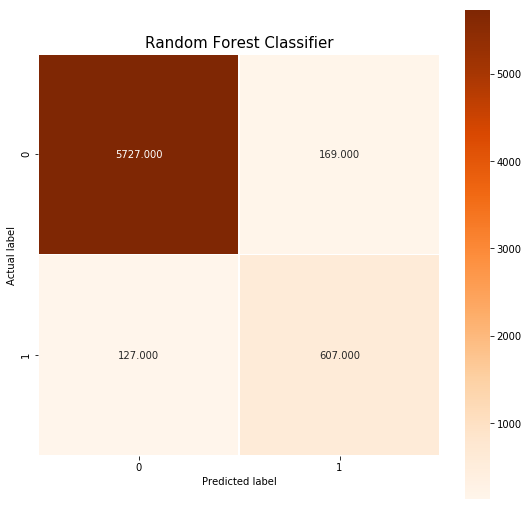

In [46]:
RF = sklearn.ensemble.RandomForestClassifier(n_estimators=25, random_state=521) 
RF.fit(X_train, y_train)

y_pred = RF.predict(X_test)
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(classification_report(y_test, y_pred))
print('The F1 score is:', f1)

MLtable = pd.DataFrame(columns = ['Algorithm','accuracy','recall','F1 Score','TPR','FPR'])

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Oranges');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
# all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title('Random Forest Classifier', size = 15);
plt.savefig('Confusion_matrix_RF.png')

recall = cm[1,1]/(cm[1,1]+cm[0,1])
tpr = cm[1,1]/(cm[1,1] + cm[1,0])
fpr = cm[0,1]/(cm[0,1] + cm[0,0])

print('TPR: {0}'.format(tpr))
print('FPR: {0}'.format(fpr))

t =pd.DataFrame([['RandomForest',acc,recall,f1,tpr,fpr]],columns = ['Algorithm','accuracy','recall','F1 Score','TPR','FPR'])
MLtable = MLtable.append(t)

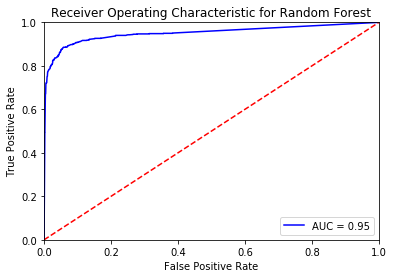

In [47]:
probs = RF.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

Fpr = dict()
Tpr = dict()
Roc_auc = dict()
Fpr[0] = fpr
Tpr[0] = tpr
Roc_auc[0] = roc_auc

plt.title('Receiver Operating Characteristic for Random Forest')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Using logistic regression

Logistic regression is a simple algorithm that is commonly used in binary classification. Due to its efficiency, it is the first model we
selected to do the classification. 

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


              precision    recall  f1-score   support

           0       0.99      0.95      0.97      5896
           1       0.69      0.88      0.78       734

    accuracy                           0.94      6630
   macro avg       0.84      0.92      0.87      6630
weighted avg       0.95      0.94      0.95      6630

The F1 score is: 0.7772455089820359
TPR: 0.8841961852861036
FPR: 0.04867706919945726


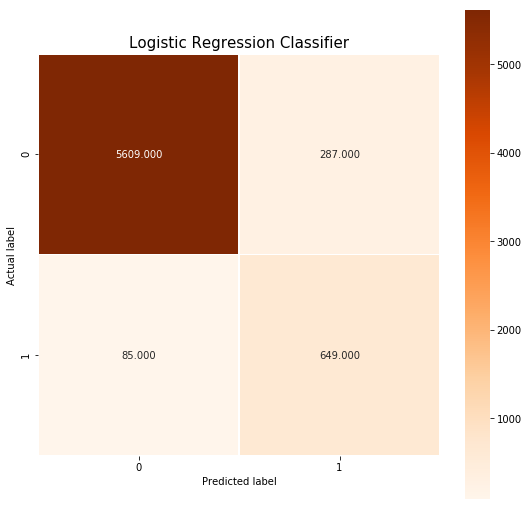

In [48]:
LR = LogisticRegression()
LR.fit(X_train, y_train)

y_pred = LR.predict(X_test)
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(classification_report(y_test, y_pred))
print('The F1 score is:', f1)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Oranges');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
# all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title('Logistic Regression Classifier', size = 15);
plt.savefig('Confusion_matrix_LR.png')

recall = cm[1,1]/(cm[1,1]+cm[0,1])
tpr = cm[1,1]/(cm[1,1] + cm[1,0])
fpr = cm[0,1]/(cm[0,1] + cm[0,0])

print('TPR: {0}'.format(tpr))
print('FPR: {0}'.format(fpr))


t =pd.DataFrame([['LogistcRegression',acc,recall,f1,tpr,fpr]],columns = ['Algorithm','accuracy','recall','F1 Score','TPR','FPR'])
MLtable = MLtable.append(t)

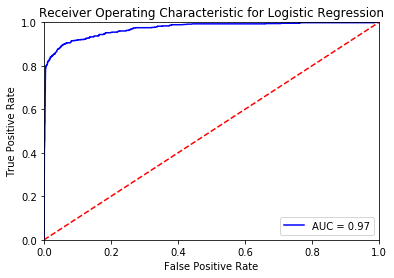

In [49]:
probs = LR.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

Fpr[1] = fpr
Tpr[1] = tpr
Roc_auc[1] = roc_auc

plt.title('Receiver Operating Characteristic for Logistic Regression')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Using KNN

An instance is classified by a majority vote of its K nearest neighbours. 

              precision    recall  f1-score   support

           0       0.98      0.85      0.91      5896
           1       0.41      0.84      0.55       734

    accuracy                           0.85      6630
   macro avg       0.69      0.84      0.73      6630
weighted avg       0.91      0.85      0.87      6630

The F1 score is: 0.5456163773920784
TPR: 0.8351498637602179
FPR: 0.15264586160108548


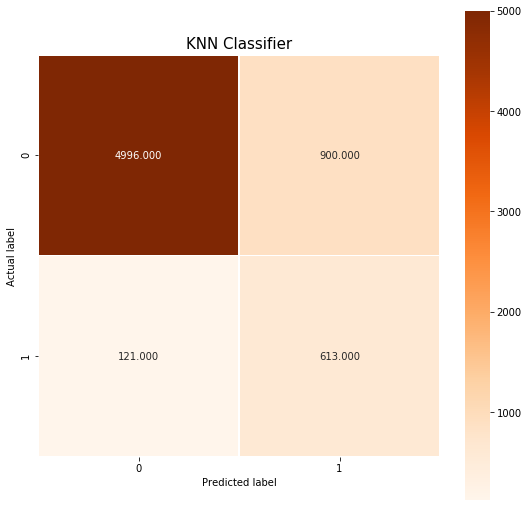

In [50]:
knn = sklearn.neighbors.KNeighborsClassifier(n_neighbors=90)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(classification_report(y_test, y_pred))
print('The F1 score is:', f1)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Oranges');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
# all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title('KNN Classifier', size = 15);
plt.savefig('Confusion_matrix_KNN.png')

recall = cm[1,1]/(cm[1,1]+cm[0,1])
tpr = cm[1,1]/(cm[1,1] + cm[1,0])
fpr = cm[0,1]/(cm[0,1] + cm[0,0])

print('TPR: {0}'.format(tpr))
print('FPR: {0}'.format(fpr))

t =pd.DataFrame([['KNN',acc,recall,f1,tpr,fpr]],columns = ['Algorithm','accuracy','recall','F1 Score','TPR','FPR'])
MLtable = MLtable.append(t)

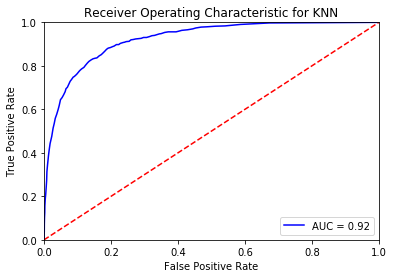

In [51]:
probs = knn.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

Fpr[2] = fpr
Tpr[2] = tpr
Roc_auc[2] = roc_auc

plt.title('Receiver Operating Characteristic for KNN')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Using SVM 

A Support Vector Machine is a discriminative classifier formally defined by a separating hyperplane. In other words, given labeled training data(supervised learning), the algorithm outputs an optimal hyperplane which categorizes new examples. In two dimentional space this hyperplane is a line dividing a plane in two parts where in each class lay in either side.

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


              precision    recall  f1-score   support

           0       0.98      0.95      0.97      5896
           1       0.67      0.88      0.76       734

    accuracy                           0.94      6630
   macro avg       0.83      0.91      0.86      6630
weighted avg       0.95      0.94      0.94      6630

The F1 score is: 0.7620730270906949
TPR: 0.8814713896457765
FPR: 0.05376526458616011


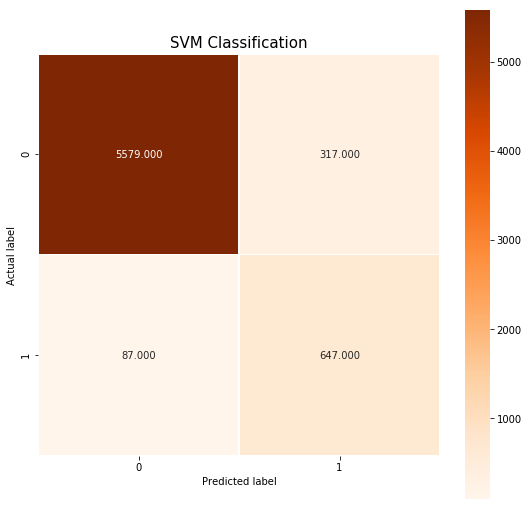

In [52]:
svc = sklearn.svm.SVC(kernel='rbf') 
svc.fit(X_train, y_train)

y_pred = svc.predict(X_test)
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(classification_report(y_test, y_pred))
print('The F1 score is:', f1)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Oranges');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
# all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title('SVM Classification', size = 15);
plt.savefig('Confusion_matrix_SVC.png')

recall = cm[1,1]/(cm[1,1]+cm[0,1])
tpr = cm[1,1]/(cm[1,1] + cm[1,0])
fpr = cm[0,1]/(cm[0,1] + cm[0,0])

print('TPR: {0}'.format(tpr))
print('FPR: {0}'.format(fpr))

t =pd.DataFrame([['SVC',acc,recall,f1,tpr,fpr]],columns = ['Algorithm','accuracy','recall','F1 Score','TPR','FPR'])
MLtable = MLtable.append(t)

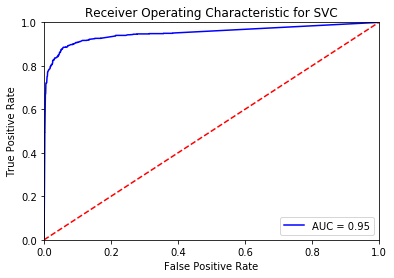

In [53]:
probs = RF.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

Fpr[3] = fpr
Tpr[3] = tpr
Roc_auc[3] = roc_auc

plt.title('Receiver Operating Characteristic for SVC')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Decision Tree

A decision tree is a decision support tool that uses a tree-like graph or model of decisions and their possible consequences, including chance event outcomes, resource costs, and utility. It is one way to display an algorithm that only contains conditional control statements.

A decision tree is a flowchart-like structure in chich each internal node represents a "test" on an attribute, each branch represents the outcome of the test, and each leaf node represents a class label. The path from root to leaf represent classification rules.

In [54]:
dtree = sklearn.tree.DecisionTreeClassifier()
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [55]:

#decision tree graph

#dot_data = StringIO()
#tree.export_graphviz(dtree, out_file = dot_data)
#print(dot_data)
#graph = pydot.graph_from_dot_data(dot_data.getvalue())
#graph[0].write_pdf('decision_tree_picture.pdf')



tree.export_graphviz(dtree, out_file = "tree.dot",feature_names = ['state_CA','state_NY','state_TX','state_MA','state_FL', 'IsSoftware','IsBiotechnology', 'IsE-Commerce','IsMobile','IsTechnology','totalfunding_small','totalfunding_meidum','totalfunding_large','totalfunding_verylarge','funding_round_code_A','funding_round_code_B','funding_round_code_C','funding_round_code_D','funding_round_code_E','funding_round_code_F','funding_round_code_G','raiseamount_small','raiseamount_meidum','raiseamount_large','raiseamount_verylarge','priceamount_small','priceamount_large','yearsoffund_lt5yr','yearsoffund_5to7yr','yearsoffund_7to10yr','yearsoffund_gt10yr','fundroundgt2','funding_round_type_angel','funding_round_type_convertible_note','funding_round_type_debt_financing','funding_round_type_equity_crowdfunding','funding_round_type_grant','funding_round_type_non_equity_assistance','funding_round_type_post_ipo_debt','funding_round_type_post_ipo_equity','funding_round_type_private_equity','funding_round_type_product_crowdfunding','funding_round_type_secondary_market','funding_round_type_seed','funding_round_type_undisclosed','funding_round_type_venture'])
graph = pydot.graph_from_dot_file("tree.dot")
graph[0].write_pdf('decision_tree_picture.pdf')

graph[0].write_png("tree.png")

from IPython.display import Image
Image(filename=r"tree.png", width=800)


              precision    recall  f1-score   support

           0       0.98      0.97      0.97      5896
           1       0.75      0.81      0.78       734

    accuracy                           0.95      6630
   macro avg       0.86      0.89      0.87      6630
weighted avg       0.95      0.95      0.95      6630

The F1 score is: 0.7784352399737015
TPR: 0.8065395095367848
FPR: 0.03307327001356852


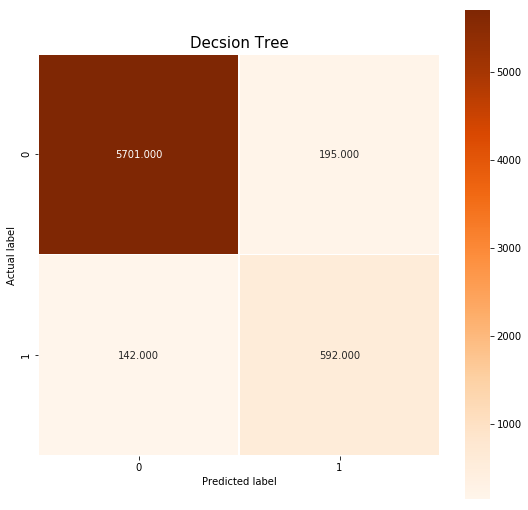

In [56]:
y_pred = dtree.predict(X_test)
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(classification_report(y_test, y_pred))
print('The F1 score is:', f1)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Oranges');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
# all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title('Decsion Tree', size = 15);
plt.savefig('Confusion_matrix_dtree.png')

recall = cm[1,1]/(cm[1,1]+cm[0,1])
tpr = cm[1,1]/(cm[1,1] + cm[1,0])
fpr = cm[0,1]/(cm[0,1] + cm[0,0])

print('TPR: {0}'.format(tpr))
print('FPR: {0}'.format(fpr))

t =pd.DataFrame([['Decision Tree',acc,recall,f1,tpr,fpr]],columns = ['Algorithm','accuracy','recall','F1 Score','TPR','FPR'])
MLtable = MLtable.append(t)

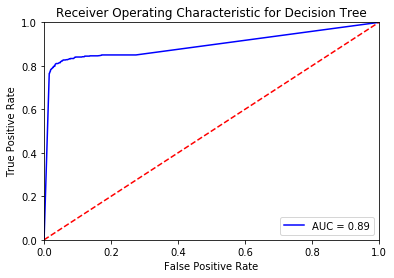

In [57]:
probs = dtree.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

Fpr[4] = fpr
Tpr[4] = tpr
Roc_auc[4] = roc_auc

plt.title('Receiver Operating Characteristic for Decision Tree')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Perceptron

In [58]:
#Perceptron

from sklearn.linear_model import Perceptron

ppn = Perceptron(eta0=0.01, random_state=100)
y_pred = ppn.fit(X_train, y_train).predict(X_test)

acc_ppn = round(ppn.score(X_train, y_train) *100, 2)
print('Training accuracy for ppn:', acc_ppn)
acc_ppnn = round(ppn.score(X_test, y_test)*100, 2)
print('Test accuracy for ppn:', acc_ppn)


Training accuracy for ppn: 90.74
Test accuracy for ppn: 90.74


In [59]:
MLtable

Algorithm  accuracy    recall  F1 Score       TPR       FPR
0       RandomForest  0.955354  0.782216  0.803974  0.826975  0.028664
0  LogistcRegression  0.943891  0.693376  0.777246  0.884196  0.048677
0                KNN  0.846003  0.405155  0.545616  0.835150  0.152646
0                SVC  0.939065  0.671162  0.762073  0.881471  0.053765
0      Decision Tree  0.949170  0.752224  0.778435  0.806540  0.033073

## Conclusion

#### Random Forest has the highest acurracy, recall and F1 scores amongthe algorithms. Decision Tree is the second best.
#### We use accuracy, F1 score and AUC score to compare the performance of different models, but the F1 score is our primary metric. The ﬁgure summarize the results of each model on the validation set (see figure above). We also plot the ROC curve to compare the three models with different thresholds (see figure below). We can know the Random Forest model has better performance on this task.

## AUC-ROC curves

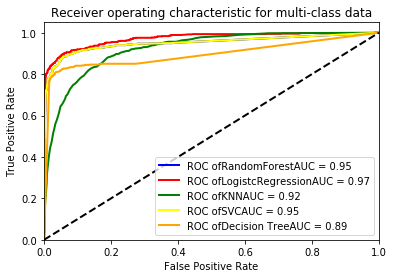

In [60]:
colors = ['blue', 'red', 'green','yellow','orange']
for i in range(5):
    plt.plot(Fpr[i], Tpr[i], color=colors[i], lw=2,
             label='ROC of' + str(MLtable.reset_index().Algorithm[i]) + ('AUC = %0.2f' % Roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class data')
plt.legend(loc="lower right")
plt.show()